### 1.0 Importing and Understanding Dataset

In [1]:
import numpy as np
import pandas as pd

### visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [3]:
### To be able to see maximum columns  on screen
pd.set_option('display.max_columns', 500)

In [4]:
credit_data=pd.read_excel("final_joined_data.xlsx")

####1.1 Statistical Analysis

In [53]:
# To know the column names of a dataset
credit_data.columns

Index(['Car_owner', 'Propert_owner', 'Annual_income', 'Birthday_count',
       'Employed_days', 'label'],
      dtype='object')

In [54]:
# To find description of the data in the DataFrame
credit_data.describe()

,Annual_income,Birthday_count,Employed_days,label
count,1.503000e+03,1503.000000,1503.000000,1503.00000
mean,1.913865e+05,-16028.565536,59248.783766,0.10978
std,1.134341e+05,4227.376476,137726.763084,0.31272
min,3.375000e+04,-24946.000000,-14887.000000,0.00000
25%,1.215000e+05,-19535.000000,-3229.500000,0.00000
50%,1.665000e+05,-15653.000000,-1581.000000,0.00000
75%,2.250000e+05,-12411.500000,-431.500000,0.00000
max,1.575000e+06,-7705.000000,365243.000000,1.00000


In [50]:
# To print information about the DataFrame
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Car_owner       1503 non-null   object
 1   Propert_owner   1503 non-null   object
 2   Annual_income   1503 non-null   int64 
 3   Birthday_count  1503 non-null   int64 
 4   Employed_days   1503 non-null   int64 
 5   label           1503 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 70.6+ KB


In [5]:
# To know number of rows and columns
credit_data.shape

(1503, 20)

#### 1.2 Checking Missing values

In [9]:
credit_data.isnull().sum()

Ind_ID               0
Gender               7
Car_owner            0
Propert_owner        0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    473
Family_Members       0
Ind_ID.1             0
label                0
dtype: int64

In [ ]:
# creating histogram with density plot
sns.histplot(data = credit_data['Type_Occupation'])


In [ ]:
# checking frequency of values in occupation column
credit_data['Type_Occupation'].value_counts()

Laborers                 259
Core staff               173
Managers                 131
Sales staff              119
Drivers                   85
High skill tech staff     63
Medicine staff            49
Accountants               42
Security staff            24
Cleaning staff            20
Cooking staff             19
Private service staff     16
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
Realty agents              2
IT staff                   2
Name: Type_Occupation, dtype: int64

In [ ]:
# library to examine missing values
import missingno as msno
# creating bar plot to see the missing values
msno.bar(credit_data)

In [ ]:
msno.heatmap(credit_data) # creating heatmap on correaltion

#### 1.3 Dropping columns with missing values

In [6]:
# dropping features which have null values
credit_data.dropna(axis='columns', how='any', inplace=True)

#verify the shape of data set
credit_data.shape

(1503, 18)

#### 1.4 Dropping irrelevant features

In [7]:
# dropping duplicate column
credit_data.drop(columns=['Ind_ID.1','Ind_ID', 'Mobile_phone', 'Work_phone', 'Phone', 'EMAIL_ID', 'Type_Income', 'Education', 'Marital_status', 'Housing_type', 'Children', 'Family_Members'], inplace=True)
#verify the shape of data set
credit_data.shape

(1503, 6)

### 2.0 Graphical Analysis

####2.1 Checking distribution of features

In [7]:
X=credit_data.iloc[:,2:-1]
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Annual_income   1503 non-null   int64
 1   Birthday_count  1503 non-null   int64
 2   Employed_days   1503 non-null   int64
dtypes: int64(3)
memory usage: 35.4 KB


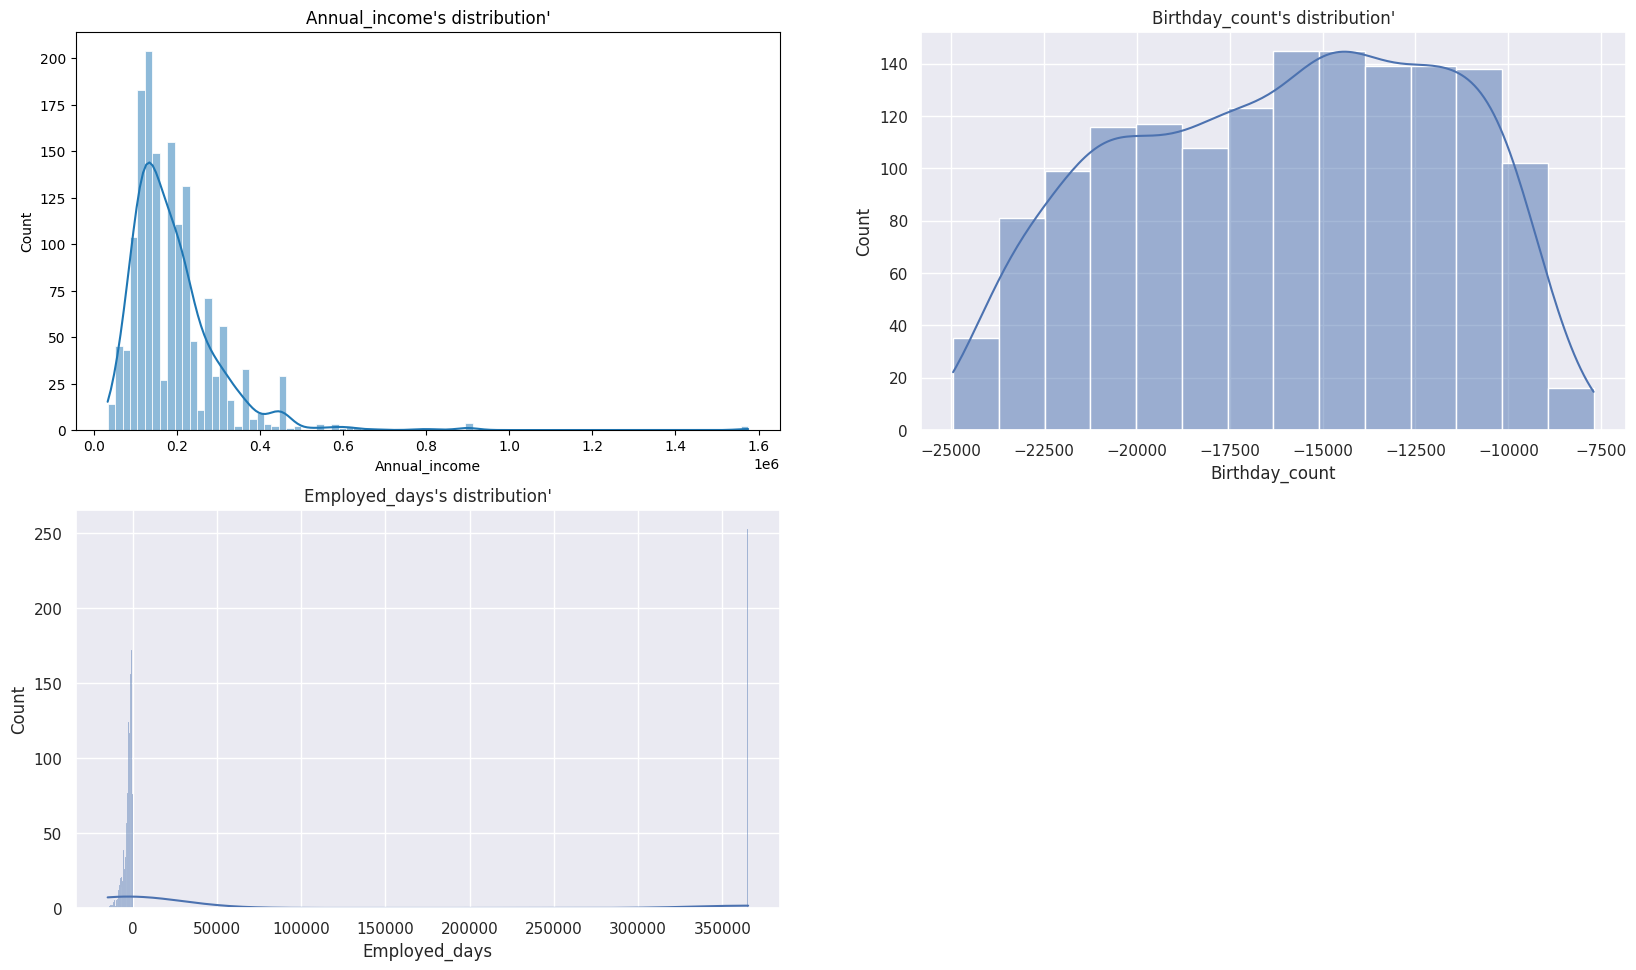

In [8]:
plt.figure(figsize=(20,30))
for i in enumerate(X.columns):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.histplot(data=X, x=i[1], kde=True)
  plt.title("{}'s distribution'".format(i[1]))

##### Observations


1. Annual Income is right skewed distribution meaning there are outliers on the right side of distribution
2. Employed days has right skewed distribution

#### **2.3 Checking Outliers in independent features**

In [8]:
### Getting independent features

independent_features=[feature for feature in credit_data.columns if feature in ['Annual_income', 'Birthday_count', 'Employed_days']]
print(independent_features)

['Annual_income', 'Birthday_count', 'Employed_days']


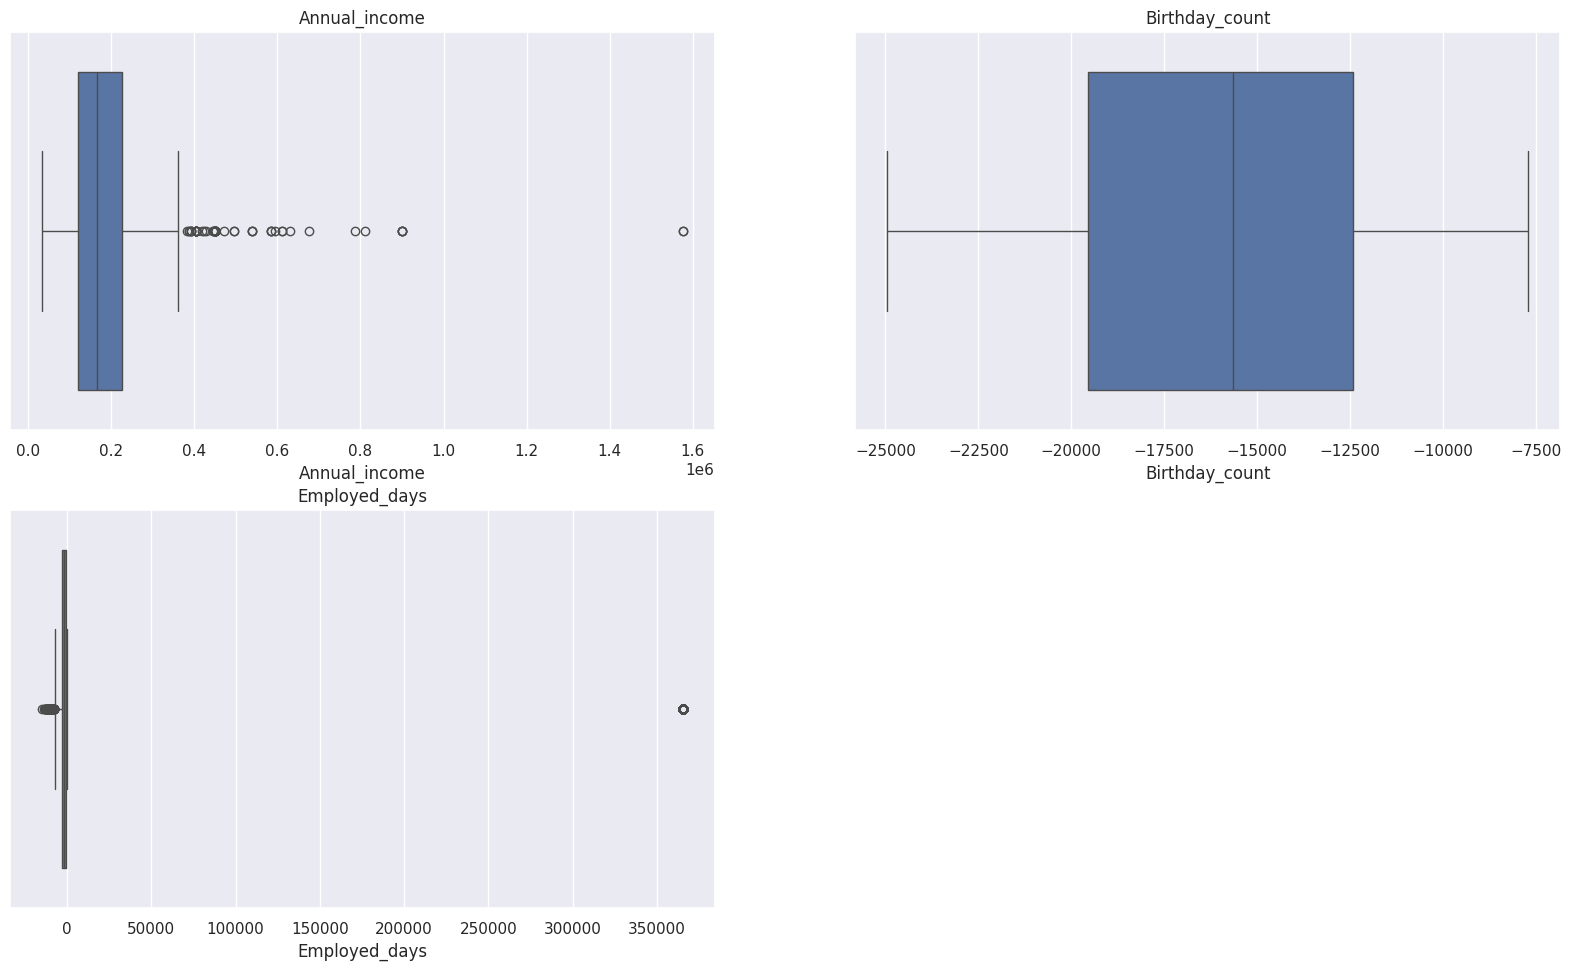

In [16]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.boxplot(data=credit_data, x=i[1])
  plt.title("{}".format(i[1]))

##### Observations

1. Annual Income and Employed days has outliers
2. Birthday count has zero outliers


#### 2.4 Trimming outliers

In [10]:
#"""This function takes dataset, feature to be trimmed and the value after which we have to trim the data
  # and returns the dataset after trimming outliers in input feature. """
def outlier_trimmer_upper(data_set, feature, trimming_value):
   threshold=data_set[feature].quantile(trimming_value/100)
   data_set=data_set[data_set[feature]<threshold]
   return data_set

#"""This function takes dataset, feature to be trimmed and the value after which we have to trim the data and returns the dataset after trimming outliers in input feature.
def outlier_trimmer_lower(data_set, feature, trimming_value):
   threshold=data_set[feature].quantile(trimming_value/100)
   data_set=data_set[data_set[feature]>threshold]
   return data_set

In [42]:
### shape of data before trimming
model_data=credit_data[['Annual_income', 'Birthday_count', 'Employed_days', 'label']]
model_data.shape

(1503, 4)

In [43]:
## removing 1 percent outliers in BloodPressure, SkinThickness, BMI and Age as these feature has less no of outliers
for feature in ['Annual_income', 'Employed_days']:
   trimmed_data=outlier_trimmer_upper(model_data, feature, 99)

In [55]:
### shape of data after trimming
trimmed_data.shape

(1250, 4)

#### 2.5 Re-checking outliers after trimming outliers in independent

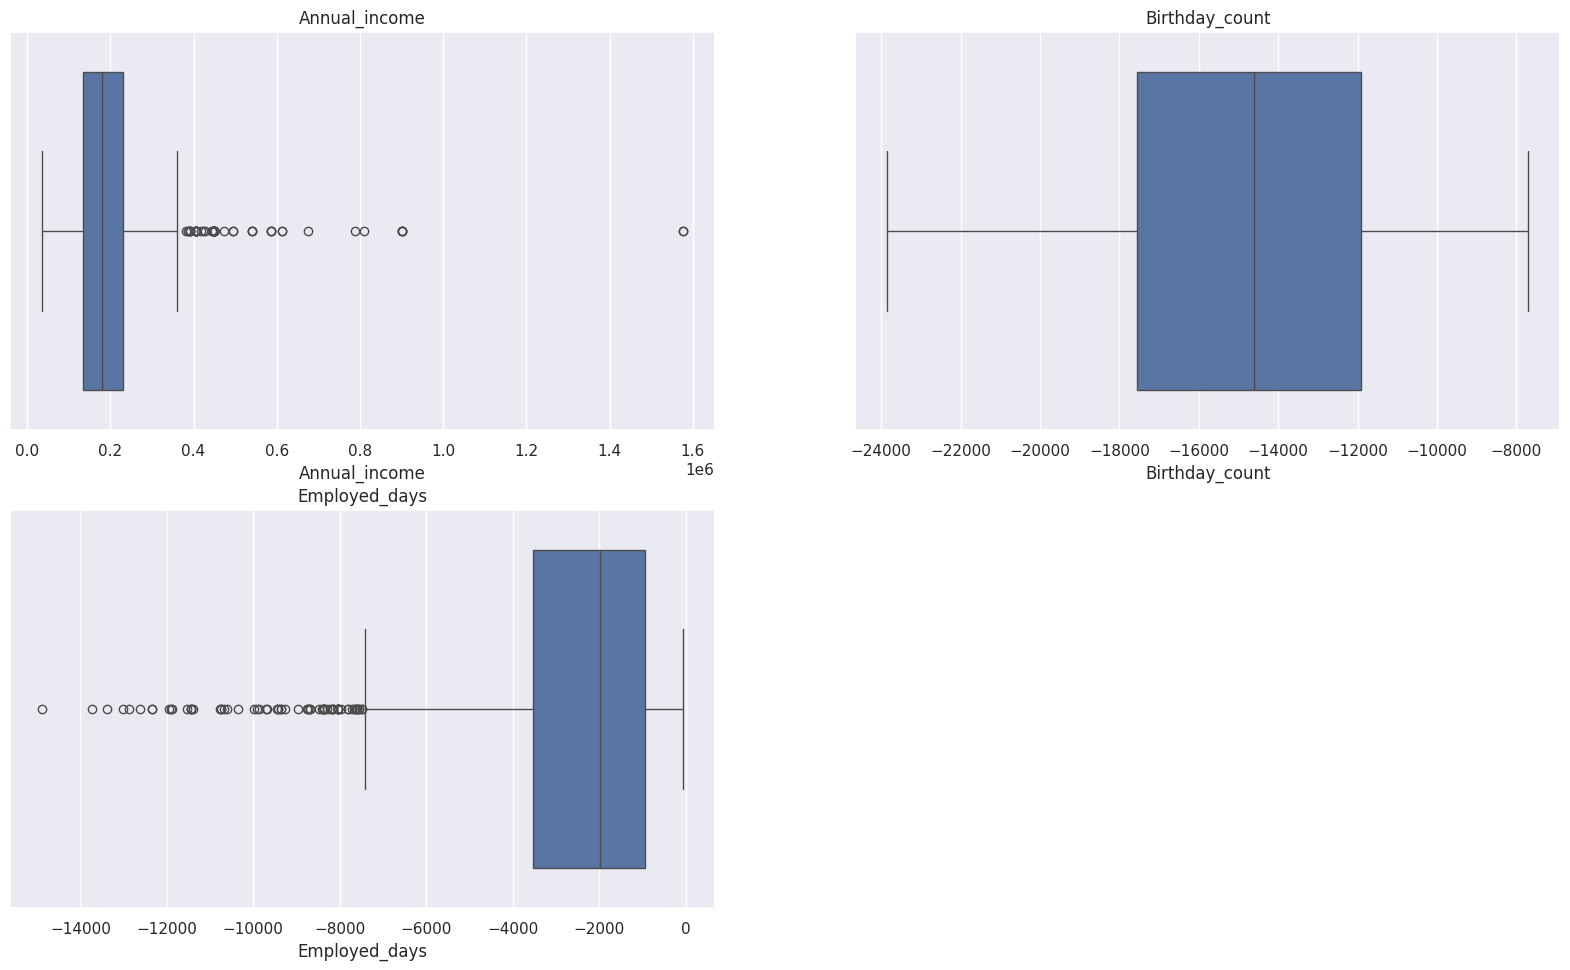

In [45]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.boxplot(data=data, x=i[1])
  plt.title("{}".format(i[1]))

##### Observations

1. Outliers decreased for Annual income and Employed_days

#### 2.6 Rechecking distribution of independent feature after trimming outlier

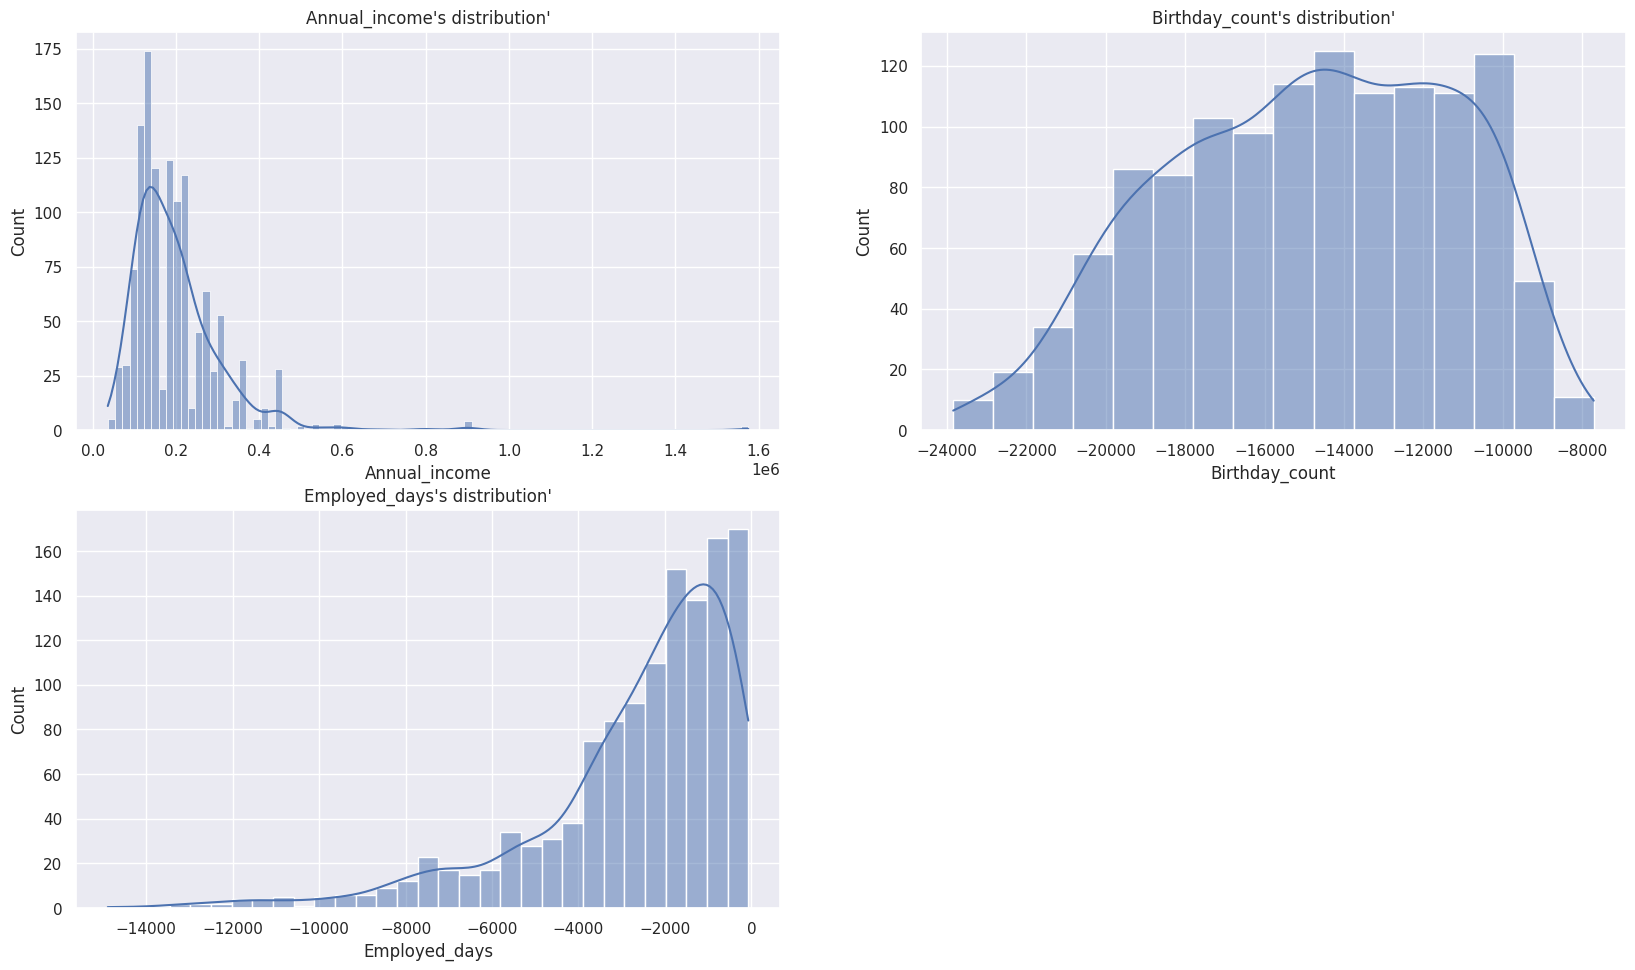

In [46]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.histplot(data=data, x=i[1], kde=True)
  plt.title("{}'s distribution'".format(i[1]))


#### 2.7 Checking imbalance of data before and after trimming outliers

##### 2.7.1 Before Trimming outliers

<Axes: xlabel='label', ylabel='count'>

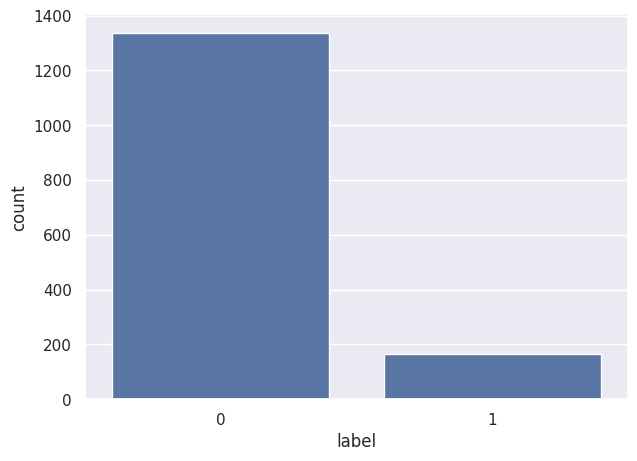

In [47]:
sns.countplot(data=model_data, x='label')

##### 2.7.2 After Trimming outliers

<Axes: xlabel='label', ylabel='count'>

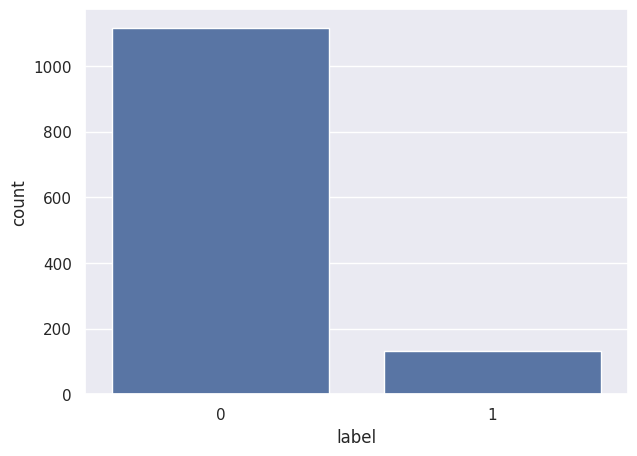

In [48]:
sns.countplot(data=trimmed_data, x='label')

#### 2.8 Relationship between independent features and dependent feature

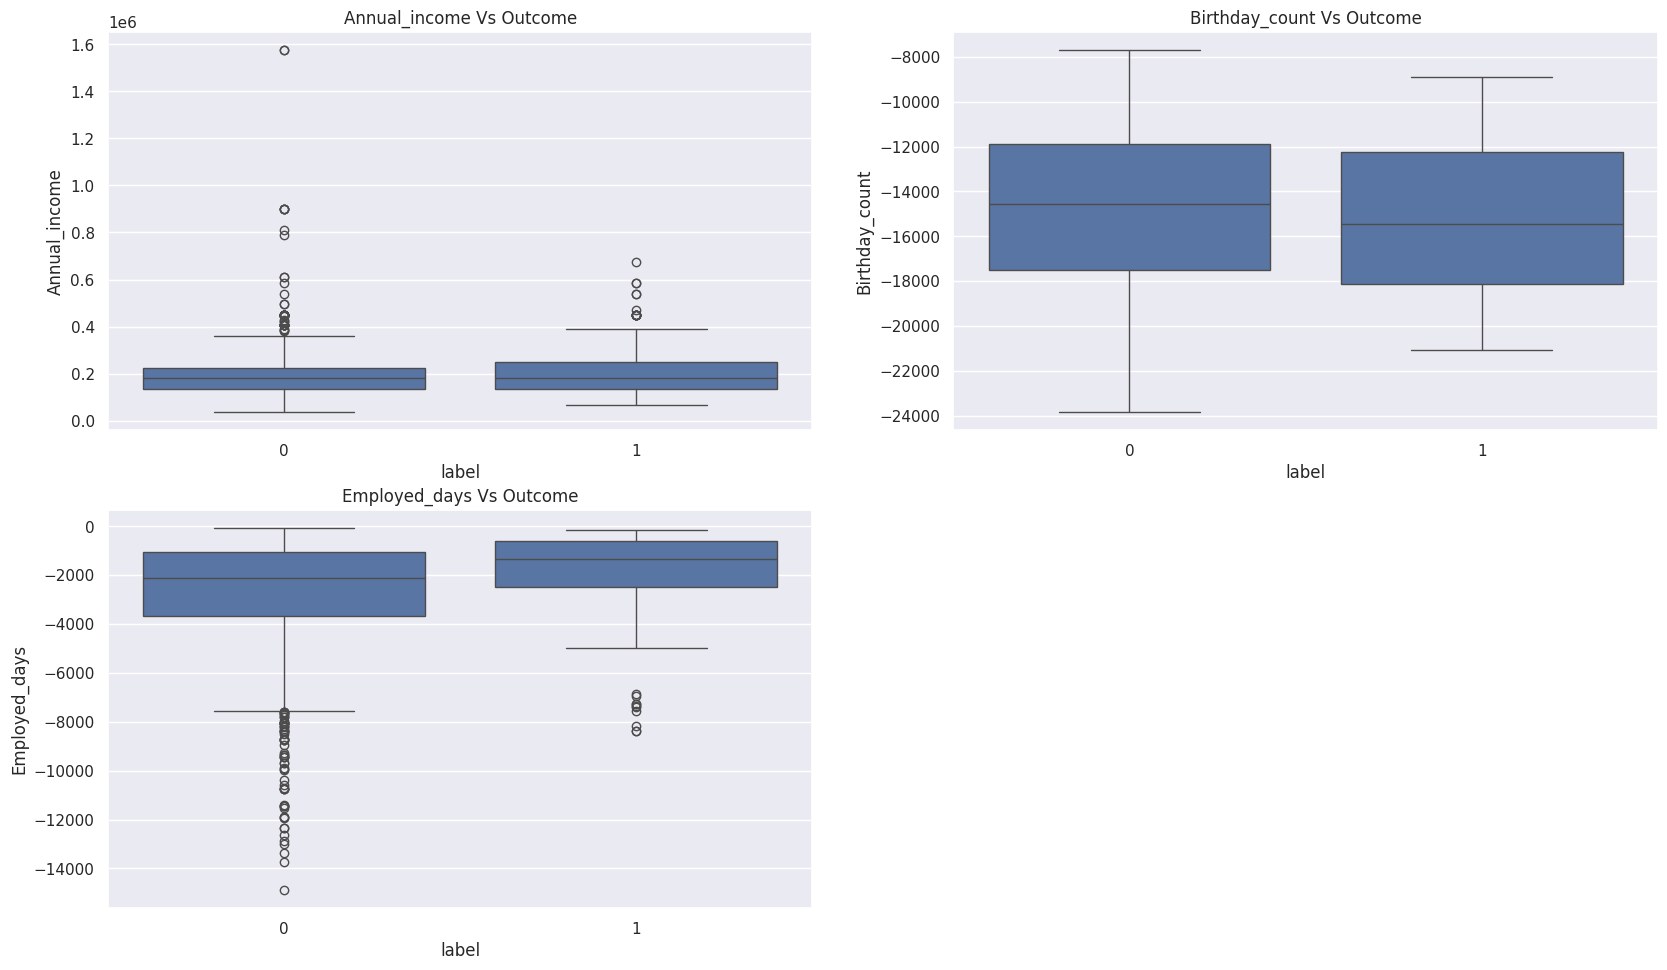

In [49]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.boxplot(data=trimmed_data, y=i[1], x='label')
  plt.title("{} Vs Outcome".format(i[1]))

#### Observations

- Birthday_count do not show any variation for outcome of Zero and One. Hence dropping this feature.

In [58]:
trimmed_data.drop(columns=['Birthday_count'], inplace=True)

### 3.0 Model Building

#### 3.1 Getting independent features in dataset(X) and dependent feature in series(y)

In [59]:
trimmed_data.head()

,Annual_income,Employed_days,label
1,135000,-3173,0
2,247500,-1347,0
3,157500,-828,0
4,216000,-3112,0
5,202500,-2289,0


In [92]:
X=trimmed_data.iloc[:,:-1]
y=trimmed_data.iloc[:,-1]
X.head()
y.value_counts()

0    1117
1     133
Name: label, dtype: int64

#### 3.2 Feature Selection

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.366100
         Iterations 6
                        Results: Logit
Model:              Logit            Method:           MLE     
Dependent Variable: label            Pseudo R-squared: -0.080  
Date:               2024-03-03 17:20 AIC:              919.2507
No. Observations:   1250             BIC:              929.5125
Df Model:           1                Log-Likelihood:   -457.63 
Df Residuals:       1248             LL-Null:          -423.65 
Converged:          1.0000           LLR p-value:      1.0000  
No. Iterations:     6.0000           Scale:            1.0000  
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Annual_income   -0.0000   0.0000 -8.4773 0.0000 -0.0000 -0.0000
Employed_days    0.0004   0.0001  7.1893 0.0000  0.0003  0.0005



##### Observations

- It seems annual income, employment period arenot a good predictor, based on the created model.
- We may have to do more data cleaning based on this result.Basically dealing better with outliers.
- However, let's go ahead.

#### 3.2 Splitting data into Training and Test data

In [93]:
### random state train test split will be same with all people using random_state=16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [63]:
X_train.head()

,Annual_income,Employed_days
111,256500,-1674
447,171000,-166
767,351000,-1081
1470,180000,-1203
1356,450000,-3574


In [64]:
y_train.head()

111     0
447     1
767     0
1470    0
1356    0
Name: label, dtype: int64

In [65]:
X_test.head()

,Annual_income,Employed_days
1123,225000,-2537
1222,270000,-1741
465,135000,-866
1478,247500,-1871
1159,135000,-670


In [66]:
y_test.head()

1123    0
1222    0
465     1
1478    0
1159    0
Name: label, dtype: int64

In [94]:
### both will have same shape
X_train.shape, y_train.shape

((875, 2), (875,))

#### 3.3 Standardisation/ feature scaling the dataset

In [95]:
### Crating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [96]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.19784785,  0.62834709],
       [ 0.97504817,  0.2828228 ],
       [ 1.36364834,  0.38142761],
       ...,
       [-0.57935248,  0.95594323],
       [ 0.62530803, -1.69945981],
       [-0.19075232,  0.44050901]])

In [97]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[ 1.97847846e-01,  9.05026828e-02],
       [ 5.86448010e-01,  4.14839159e-01],
       [-5.79352482e-01,  7.71364809e-01],
       [ 3.92147928e-01,  3.61869634e-01],
       [-5.79352482e-01,  8.51226555e-01],
       [-1.90752318e-01, -1.71085280e-01],
       [-1.90752318e-01, -7.75752781e-01],
       [-5.79352482e-01,  9.86095115e-01],
       [ 1.97847846e-01, -3.79296259e-01],
       [-5.79352482e-01,  1.08551484e+00],
       [ 1.97847846e-01, -9.46477635e-01],
       [-6.57072515e-01, -5.57746980e-02],
       [ 3.92147928e-01,  6.13678608e-01],
       [-1.90752318e-01,  5.72932819e-01],
       [ 9.75048174e-01,  6.08789113e-01],
       [-7.11476538e-01, -2.32203962e-01],
       [-1.13032285e-01,  7.72179725e-01],
       [-9.67952646e-01,  1.08510738e+00],
       [-8.90232613e-01,  7.61585820e-01],
       [ 1.97847846e-01,  6.45460323e-01],
       [ 7.03028059e-01,  8.57338423e-01],
       [-7.73652564e-01,  1.54881029e-01],
       [-5.79352482e-01, -2.20552250e+00],
       [ 2.

### 4.0 Model

In [98]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [99]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

##### 4.1 Using Above Model to get prediction for test data

In [100]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 4.2 Performance Metrics

##### 4.2.1 Confusion Matrix

In [101]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[338,   0],
       [ 37,   0]])

##### 4.2.2 Accuracy Score

In [102]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.9


##### 4.2.3 Precision Score

In [103]:
print(round(precision_score(y_test, logistic_reg_pred), 2))

0.0


##### 4.2.4 Recall **Score**

In [104]:
print(round(recall_score(y_test, logistic_reg_pred), 2))

0.0


##### 4.2.5 F-1 **Score**

In [105]:
from sklearn.metrics import f1_score
print(round(f1_score(y_test, logistic_reg_pred), 2))

0.0


##### 4.2.6 ROC AUC Score

In [106]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.5

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##### 4.2.7 Log Loss

In [107]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, logistic_reg.predict_proba(X_test))
logloss

0.31412086169503184